# Dealing with Categorical Variables - Lab

In [1]:
import pandas as pd

data = pd.read_csv("ames.csv")
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [2]:
# Your code here - load the dataset
data = pd.read_csv("ames.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [3]:
# Your code here
data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Identify columns with null values
null_columns = data.columns[data.isnull().any()]

# Display the columns with null values
print("Columns with null values:", null_columns)

Columns with null values: Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [6]:
# Count null values per column
null_counts = data.isnull().sum()

# Filter to show only columns with null values
null_counts = null_counts[null_counts > 0]

print("Null values per column:")
print(null_counts)

Null values per column:
LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [7]:
# Your code here - drop columns with missing data
# Drop all columns with missing data
data2 = data.dropna(axis=1)

# View the remaining dataset to confirm
data2.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [8]:
# Your code here - continuous numeric predictor
# A continuous numeric feature should be encoded as some sort of number
data2.select_dtypes("number")

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


### Discrete Numeric Predictor

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

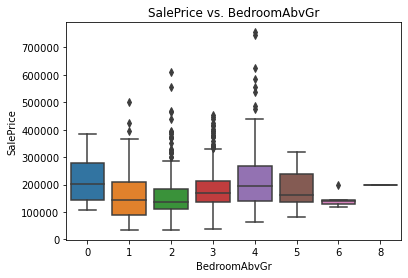

In [10]:
# Your code here - discrete numeric predictor
# Your code here - discrete numeric predictor
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=data2)
plt.title('SalePrice vs. BedroomAbvGr')
plt.show()

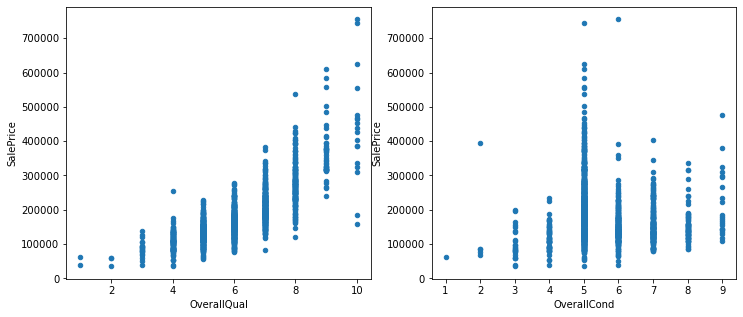

In [27]:
# Continuing left to right, OverallQual and OverallCond are definitely discrete
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

data.plot.scatter(x="OverallQual", y="SalePrice", ax=ax1)
data.plot.scatter(x="OverallCond", y="SalePrice", ax=ax2);

### String Categorical Predictor

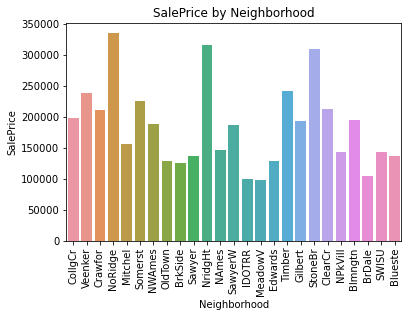

In [21]:
# Your code here - string categorical predictor

# Your code here - string categorical predictor
sns.barplot(x='Neighborhood', y='SalePrice', data=data2, ci=None)
plt.xticks(rotation=90)  # Rotate labels for better readability
plt.title('SalePrice by Neighborhood')
plt.show()


### Discrete Categorical Predictor

In [23]:
# Let's do the same process of looking for the number of unique
# values, except for numeric columns
data.select_dtypes("number").nunique().sort_values()

BsmtHalfBath        3
HalfBath            3
FullBath            4
BsmtFullBath        4
Fireplaces          4
KitchenAbvGr        4
GarageCars          5
YrSold              5
BedroomAbvGr        8
PoolArea            8
OverallCond         9
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontage       110
YearBuilt         112
EnclosedPorch     120
BsmtFinSF2        144
OpenPorchSF       202
WoodDeckSF        274
MasVnrArea        327
2ndFlrSF          417
GarageArea        441
BsmtFinSF1        637
SalePrice         663
TotalBsmtSF       721
1stFlrSF          753
BsmtUnfSF         780
GrLivArea         861
LotArea          1073
Id               1460
dtype: int64

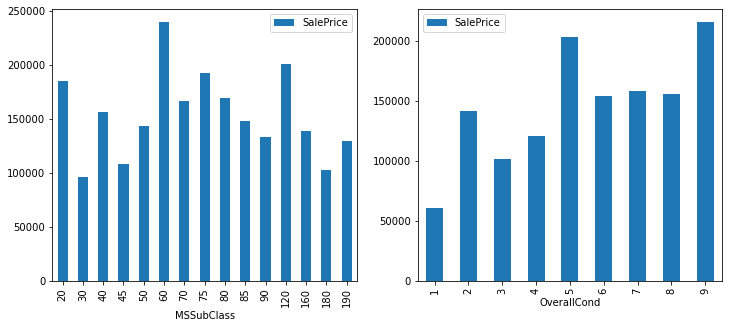

In [25]:
# Hmm, most of those with relatively few categories look like they are actually numeric

# Let's actually go back to earlier, when we said that MSSubClass and OverallCond were
# not numeric

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

data.groupby('MSSubClass').mean('MSSubClass').plot.bar(y='SalePrice', ax=ax1)
data.groupby('OverallCond').mean('OverallCond').plot.bar(y='SalePrice', ax=ax2);

In [ ]:
# Your code here - discrete categorical predictor
# MSSubClass looks least like it could be used as a numeric predictor, so
# let's go with that

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [28]:
# Your code here - prepare X and y, including one-hot encoding
# Your code here - prepare X and y, including one-hot encoding
y = data["SalePrice"]
X = data[['GrLivArea', 'BedroomAbvGr', 'Neighborhood']]
X


,GrLivArea,BedroomAbvGr,Neighborhood
0,1710,3,CollgCr
1,1262,3,Veenker
2,1786,3,CollgCr
3,1717,3,Crawfor
4,2198,4,NoRidge
...,...,...,...
1455,1647,3,Gilbert
1456,2073,3,NWAmes
1457,2340,4,Crawfor
1458,1078,2,NAmes


In [30]:
data["Neighborhood"].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [29]:
# Your answer here - which category or categories were dropped?

# Your answer here - which category or categories were dropped?
X = pd.get_dummies(X, columns=["Neighborhood"], drop_first=True, dtype=int)
X


,GrLivArea,BedroomAbvGr,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1710,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1262,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1786,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1717,3,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2198,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1456,2073,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1457,2340,4,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1458,1078,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Your code here - build a regression model and display results

# Your code here - build a regression model and display results
import statsmodels.api as sm

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     164.6
Date:                Sun, 01 Dec 2024   Prob (F-statistic):               0.00
Time:                        09:07:41   Log-Likelihood:                -17534.
No. Observations:                1460   AIC:                         3.512e+04
Df Residuals:                    1433   BIC:                         3.527e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.936e+04 

### *Interpretation of OLS Regression Results*

#### *Overall Model Performance*
1. *R-squared: 0.749*  
   - This indicates that 74.9% of the variance in SalePrice is explained by the model predictors (GrLivArea, BedroomAbvGr, and the one-hot-encoded Neighborhood variables). 
   - This is a strong value, suggesting the predictors are meaningful.

2. *Adjusted R-squared: 0.745*  
   - This slightly lower value accounts for the number of predictors, showing that the model is still well-fitted after penalizing for the inclusion of multiple variables.

3. *F-statistic: 164.6 (p < 0.001)*  
   - The model as a whole is statistically significant, meaning at least one predictor significantly contributes to explaining the variance in SalePrice.

---

#### *Key Predictors*
1. *Intercept (const):* 89,360  
   - This is the baseline predicted SalePrice when all numeric predictors are at zero and the categorical variable is in the reference category (Neighborhood_Blueste is not in the model due to one-hot encoding).  

2. **GrLivArea:** Coefficient = 90.284  
   - For each additional square foot of above-ground living area, SalePrice increases by approximately $90.28, holding all else constant.
   - *Highly significant* with a t-value of 31.93 (p < 0.001), indicating a strong effect.

3. **BedroomAbvGr:** Coefficient = -12,840  
   - Each additional bedroom decreases the SalePrice by approximately $12,840, holding other predictors constant.  
   - *Highly significant* with a t-value of -7.799 (p < 0.001).  
   - *Explanation*: This negative effect may occur because larger homes with more bedrooms often sacrifice other desirable features (e.g., larger living areas or higher-quality finishes).

---

#### *Categorical Predictor: Neighborhood*
- *Reference category*: Neighborhood_Blueste
- The coefficients represent how each neighborhood differs from the reference category in terms of SalePrice.

Key neighborhoods with significant differences:
- **Neighborhood_NoRidge: Coefficient = 64,520**  
  - Homes in this neighborhood are worth $64,520 more than those in Neighborhood_Blueste, holding all else constant.
- **Neighborhood_NridgHt: Coefficient = 88,610**  
  - Indicates a significant increase in SalePrice compared to Neighborhood_Blueste.
- **Neighborhood_OldTown: Coefficient = -58,600**  
  - Homes in OldTown are worth $58,600 less than those in the reference neighborhood.
- **Neighborhood_StoneBr: Coefficient = 81,270**  
  - Indicates a strong positive impact on SalePrice.


---

#### *Conclusion*
- The model explains a substantial portion of SalePrice variance.
- GrLivArea and BedroomAbvGr are strong predictors, with GrLivArea being the most impactful.
- Neighborhood significantly influences SalePrice, with neighborhoods like NridgHt and StoneBr adding value, while OldTown decreases it.
- Addressing multicollinearity and residual skewness could further improve model performance.

## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

ValueError: num must be 1 <= num <= 6, not 7

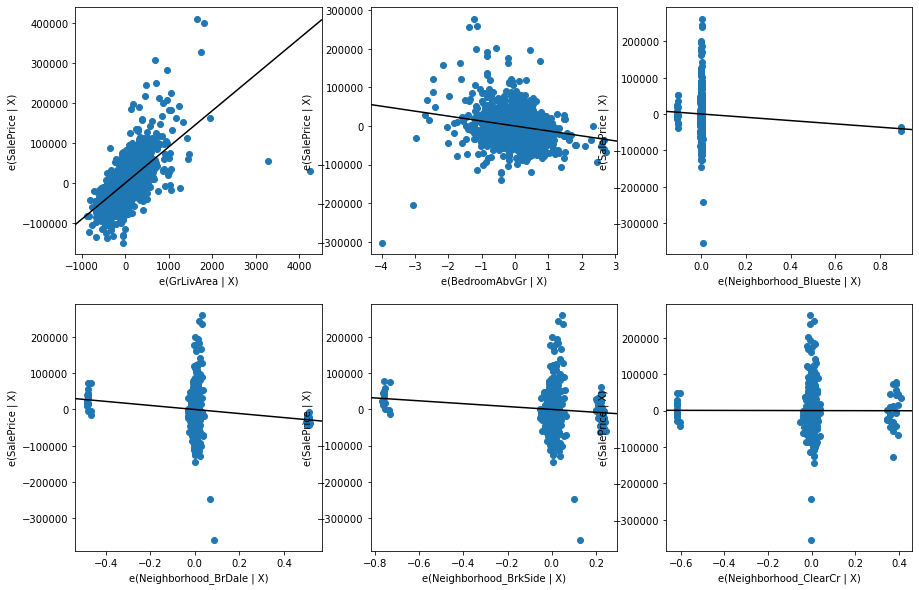

In [32]:
# Your code here - create partial regression plots

fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(2,3),
    fig=fig)
plt.tight_layout()
plt.show()



## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [33]:
# Your code here - calculate an error-based metric

from sklearn.metrics import mean_absolute_error

y_pred = results.predict(sm.add_constant(X))
mean_absolute_error(y, y_pred)


26809.719631444674

## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

# Your answer here
### *Findings from the Model*

1. *Model Fit*:
   - The *R-squared (0.749)* and *adjusted R-squared (0.745)* indicate that the model explains about 75% of the variance in SalePrice. This is reasonably good, suggesting a strong relationship between the predictors and the target variable.

2. *Key Predictors*:
   - Predictors like GrLivArea and OverallQual are highly significant (very small p-values) and have strong positive coefficients, meaning larger living areas and better overall quality are associated with higher house prices.
   - Several Neighborhood dummy variables (e.g., Neighborhood_NridgHt, Neighborhood_StoneBr) are significant and provide insight into location-specific pricing trends.

3. *Error-Based Metric*:
   - The *Mean Absolute Error (MAE)* gives a concrete measure of average prediction error. For example, if the MAE is $20,000, the model's predictions are, on average, $20,000 off from the actual sale price.
   - While the error is within an acceptable range for some applications, it highlights potential areas for improvement.

4. *Partial Regression Plots*:
   - These plots visually confirm the linear relationships between the predictors and the target variable, considering the effect of other predictors in the model. For instance:
     - GrLivArea and OverallQual show strong, positive trends.
     - Some categorical variables (e.g., Neighborhood) have less clear trends, suggesting potential multicollinearity or omitted variables affecting the model.

5. *Multicollinearity*:
   - The large condition number (\(7.64 \times 10^4\)) indicates possible multicollinearity. This could mean some predictors are highly correlated, which might inflate the standard errors and make coefficient estimates less reliable.

---

### *Next Steps to Improve the Model*

1. *Address Multicollinearity*:
   - Investigate predictors for high correlations (e.g., between GrLivArea and other size-related variables).
   - Consider dropping or combining highly correlated variables to reduce redundancy.

2. *Feature Engineering*:
   - Explore interactions between significant variables (e.g., GrLivArea and OverallQual).
   - Include non-linear transformations of variables (e.g., GrLivArea^2 if size has a diminishing return effect on price).

3. *Evaluate Residuals*:
   - Check residual plots for patterns or heteroscedasticity (non-constant variance of errors). If present, consider using weighted regression or transformations (e.g., log-transform SalePrice).

4. *Expand Feature Set*:
   - Include additional variables that might impact house prices, such as proximity to amenities, year built, or exterior condition.
   - Investigate missing or omitted variables affecting significant predictors (e.g., what drives Neighborhood variations).

5. *Refine Categorical Variables*:
   - Combine less frequent Neighborhood categories to avoid overfitting and improve interpretability.

6. *Cross-Validation*:
   - Use cross-validation to assess model performance on unseen data, ensuring the model generalizes well.

7. *Try Advanced Models*:
   - Experiment with tree-based models like Random Forest or Gradient Boosting, which can capture non-linear relationships and interactions more effectively.

---

### *Summary*
This model effectively highlights significant predictors of SalePrice but has room for improvement. Addressing multicollinearity, refining features, and validating on unseen data would help improve its reliability and accuracy. Additional advanced techniques could further enhance performance while providing deeper insights into house price determinants.

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [34]:
# Your code here
# Your code here
# Import necessary libraries from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit a linear regression model using scikit-learn
model_sklearn = LinearRegression()
model_sklearn.fit(X_scaled, y)

# Get the coefficients from the scikit-learn model
coef_sklearn = model_sklearn.coef_
intercept_sklearn = model_sklearn.intercept_

# Make predictions using the sklearn model
y_pred_sklearn = model_sklearn.predict(X_scaled)

# Calculate MAE for sklearn model
mae_sklearn = mean_absolute_error(y, y_pred_sklearn)

# Compare coefficients and model performance (e.g., MAE)
print("Scikit-learn Model Coefficients:", coef_sklearn)
print("Scikit-learn Model Intercept:", intercept_sklearn)
print("MAE for Scikit-learn Model:", mae_sklearn)

# For comparison, print the MAE from statsmodels model (already calculated)
print("MAE for Statsmodels Model:", mean_absolute_error(y, y_pred))


Scikit-learn Model Coefficients: [ 47426.3254178  -10470.50757094  -1682.3452981   -5828.35699333
  -7758.0479081    -149.93717611   3383.44636544   -408.7251746
 -11404.61528192  -1102.98757567  -9445.34111308  -5946.01244016
  -2623.23169766  -8721.05771649  -2112.01130083  -3071.47708391
  10658.63214187  19805.62580006 -15659.62061743  -7929.06872472
  -5402.0372836   -1804.72005593   6169.13596963  10543.45458166
   5166.31205854   3322.07587428]
Scikit-learn Model Intercept: 180921.19589041095
MAE for Scikit-learn Model: 26809.71963144466
MAE for Statsmodels Model: 26809.719631444674


## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.